<a href="https://colab.research.google.com/github/Bosxs/Price-Prediction-of-Used-Cars/blob/master/Price_prediction_of_used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Price prediction of used cars**



#Import libraries

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('https://raw.githubusercontent.com/Bosxs/Price-Prediction-of-Used-Cars/master/train-data.csv')
testdata = pd.read_csv('https://raw.githubusercontent.com/Bosxs/Price-Prediction-of-Used-Cars/master/test-data.csv')
# df.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)
# try fillna

# Data Overview

---



In [ ]:
dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
dataset.shape

(6019, 14)

In [ ]:
testdata.shape

(1234, 13)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [ ]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


### **Column with object data types needs to take numerical data types**

#Data cleaning and Featuring engineering

In [ ]:
dataset.isnull().values.sum()

5311

In [ ]:
dataset.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
testdata.isnull().values.sum()

1083

In [ ]:
#Number of nulls in a column
testdata.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [ ]:
#Removing the first column unnamed from the dataset and testdata. This is basically just indexing the rows
dataset = dataset.iloc[:,1:]
testdata = testdata.iloc[:,1:]

#dropping of New_Price since it is not relevant for the model
# New_Price column need to be dropped since it has too many missing values. missing values in other columns can be imputed.
dataset = dataset.drop(columns=['New_Price'],axis=1)
testdata = testdata.drop(columns = ['New_Price'], axis = 1)

In [ ]:
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
testdata.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [ ]:
dataset = dataset.dropna(how = 'any')
testdata = testdata.dropna(how = 'any')

In [ ]:
#after the removal of nulls in the column
dataset.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
testdata.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [ ]:
dataset.shape

(5975, 12)

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
testdata.duplicated().sum()

1

In [ ]:
testdata = testdata.drop_duplicates()

In [ ]:
testdata.duplicated().sum()

0

In [ ]:
testdata.shape

(1222, 11)

# Visualization

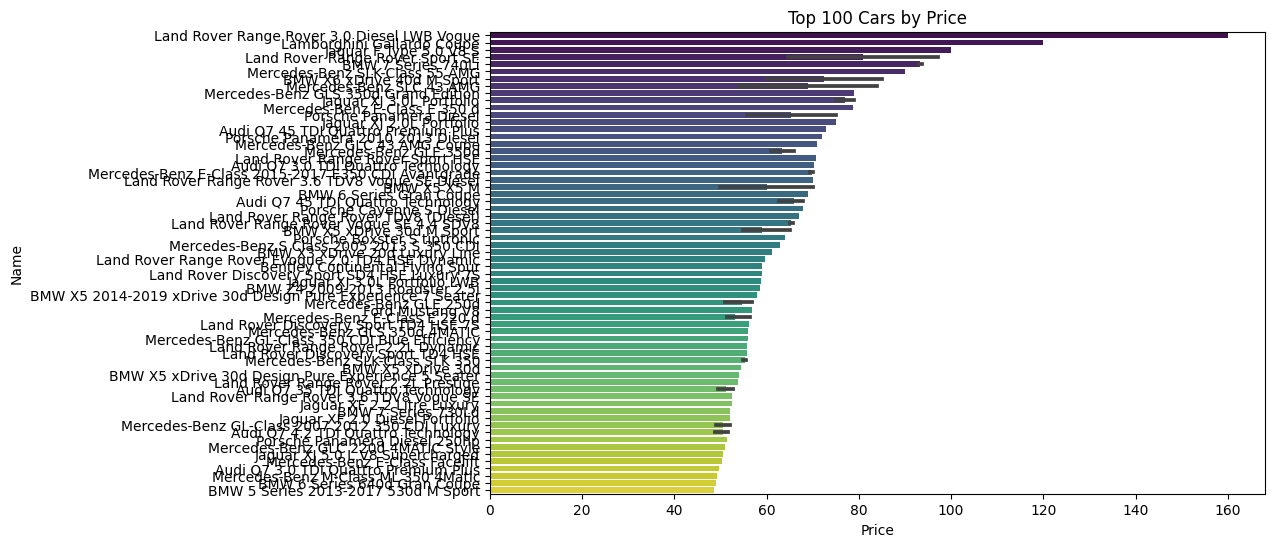

In [ ]:
top_100_cars = dataset.sort_values(by='Price', ascending=False)[:100]

plt.figure(figsize=(10, 6))
sns.barplot(y=top_100_cars['Name'], x=top_100_cars['Price'], palette="viridis")
plt.xlabel('Price')
plt.ylabel('Name')
plt.title('Top 100 Cars by Price')
plt.show()

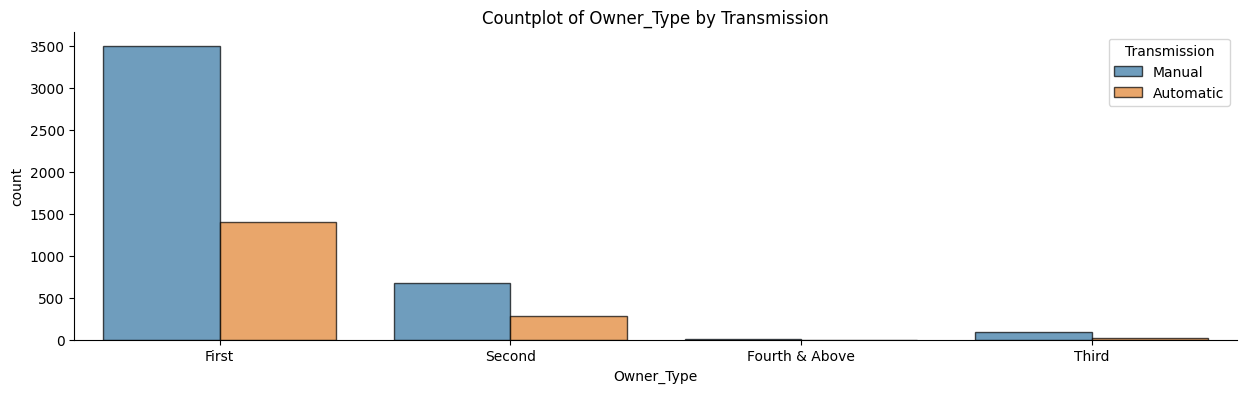

In [ ]:
plt.figure(figsize=[15, 4])
sns.countplot(x='Owner_Type', hue='Transmission', edgecolor="black", alpha=0.7, data=dataset)
sns.despine()
plt.title("Countplot of Owner_Type by Transmission")
plt.show()

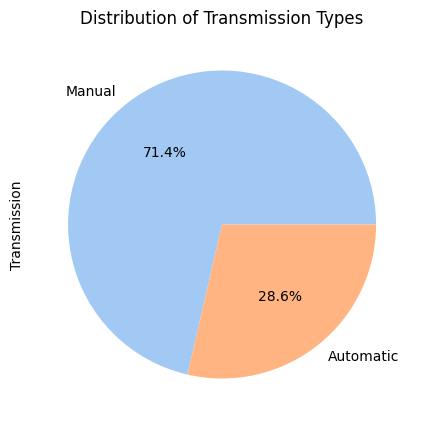

In [ ]:
plt.figure(figsize=(5, 5))
dataset['Transmission'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title('Distribution of Transmission Types')
plt.show()

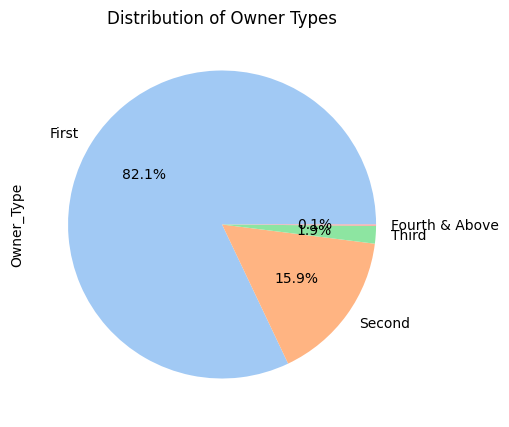

In [ ]:
plt.figure(figsize=(5, 5))
dataset['Owner_Type'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title('Distribution of Owner Types')
plt.show()

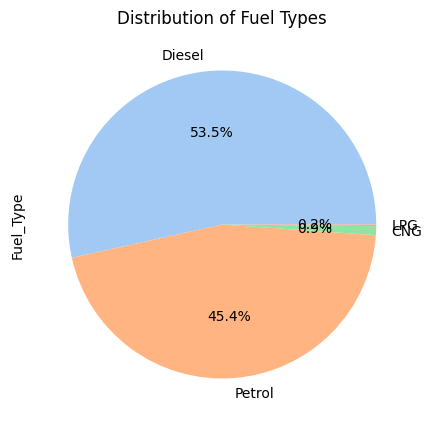

In [ ]:
plt.figure(figsize=(5, 5))
dataset['Fuel_Type'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title('Distribution of Fuel Types')
plt.show()

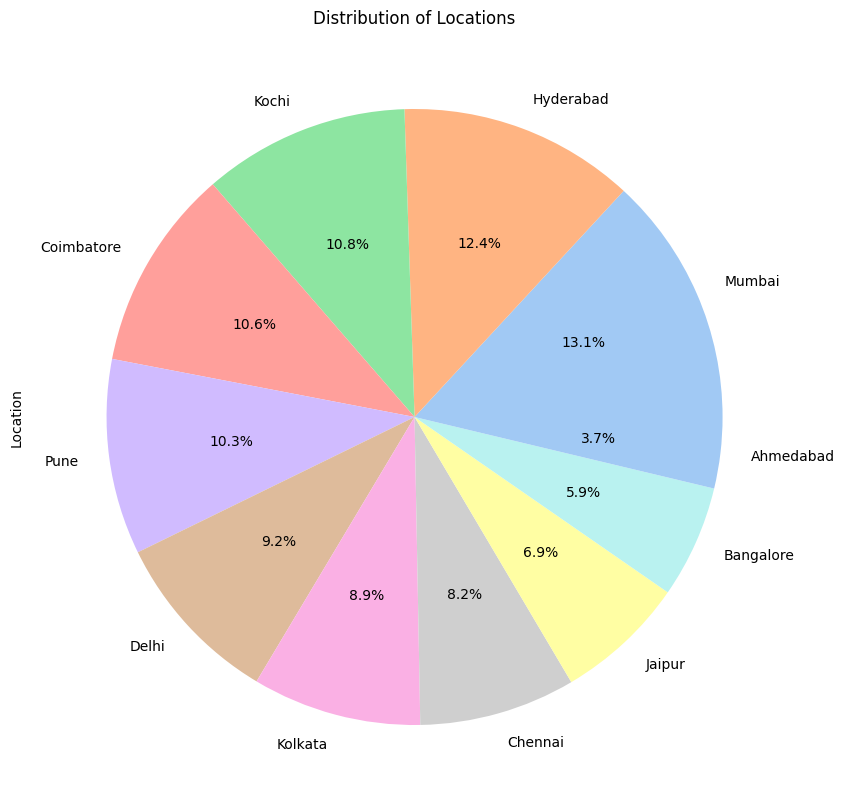

In [ ]:
plt.figure(figsize=(10, 10))
dataset['Location'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title('Distribution of Locations')
plt.show()

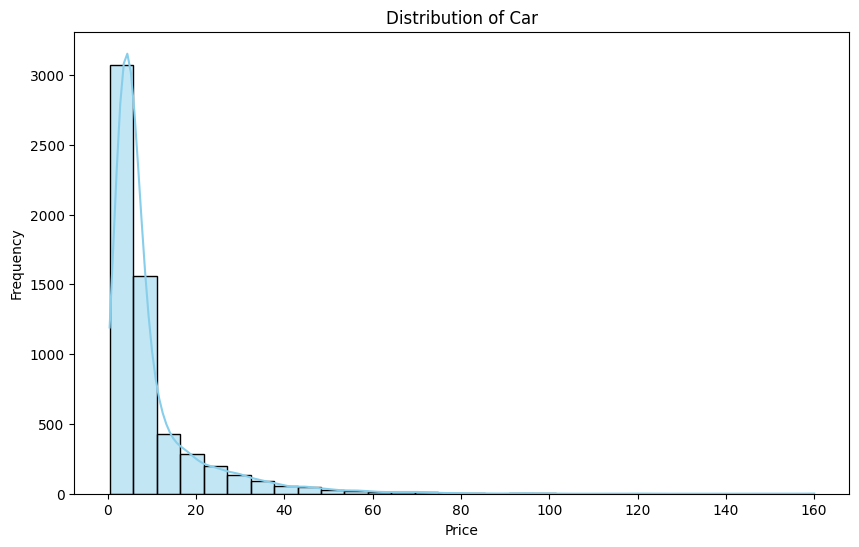

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Price'], bins=30, kde=True, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(dataset, vars=['Price', 'Mileage', 'Engine', 'Power'], kind='scatter')
plt.suptitle('Pair Plot of Car Prices and Numerical Features', y=1.02)
plt.show()

<Figure size 1200x800 with 0 Axes>

**None of the Independent variables show complete linearity with respect to the dependent variable. An equation of first order will not be able to capture the non-linearity completely which would result in a sub-par model. In order to square the variables and fit the model, we will use Linear Regression with Polynomial Features**

#Encoding categorical data

---




In [ ]:
#Number of columns in the dataset as objects
dataset.select_dtypes(include = 'object').columns

In [ ]:
#Number of unique values in the column
dataset.nunique()

# **Preprocessing**

---



In [ ]:
#Conversion of categorical column to numerical feature
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Step 1: Loop through all columns in the DataFrame
for column in dataset.columns:
    # Step 2: Check if the column type is 'object'
    if dataset[column].dtype == 'object':
        # Step 3: Apply LabelEncoder to transform the column
        dataset[column] = label_encoder.fit_transform(dataset[column].astype(str))

# Step 4: Display the updated dataset
print("Updated Dataset:")
print(dataset)


In [ ]:
dataset.head()

In [ ]:
testdata.head()

In [ ]:
testdata.select_dtypes(include = 'object').columns

In [ ]:
#Number of unique columns in Testdata
testdata.nunique()

In [ ]:
#Conversion of categorical column in testdata to numerical feature
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Step 1: Loop through all columns in the DataFrame
for column in testdata.columns:
    # Step 2: Check if the column type is 'object'
    if testdata[column].dtype == 'object':
        # Step 3: Apply LabelEncoder to transform the column
        testdata[column] = label_encoder.fit_transform(testdata[column].astype(str))

# Step 4: Display the updated dataset
print("\nUpdated Testdata:")
print(testdata)

In [ ]:
dataset.info()

In [ ]:
#Target column
target = 'Price'

In [ ]:
#Feature column
feature = ['Name','Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
           'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']


In [ ]:
dataset[feature].head()

In [ ]:
testdata[feature].head()

#Correlation Matrix

In [ ]:
dataset_2 = dataset.drop(columns='Price')
dataset_2.corrwith(dataset['Price']).plot.bar(
figsize = (16,9), title = 'correlated with Price', grid = True
)

In [ ]:
#Heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize = (16,9))
sns.heatmap(correlation_matrix, annot = True)
print("Correlation Matrix:")
print(correlation_matrix)

#Data Splitting


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


#Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Transforming the train and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# Step 2: Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Original Data
axes[0].scatter(x_train, np.zeros_like(x_train), color='black', label='Original Data')
axes[0].set_xlabel('X-axis label')
axes[0].set_title('Original Data')

# Subplot 2: Scaled Data
axes[1].scatter(x_train_scaled, np.zeros_like(x_train_scaled), color='blue', label='Scaled Data')
axes[1].set_xlabel('X-axis label')
axes[1].set_title('Scaled Data')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
test_sizes = [0.1, 0.2, 0.3]

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Train the model
    model_lr.fit(x_train_scaled, y_train)

    # Make predictions
    y_pred = model_lr.predict(x_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"Model: LinearRegression, Test Size: {test_size}")
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R2): {r2}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')

    # Scatter plot of actual vs predicted prices
    plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted Prices')

    # Plot the line representing perfect prediction (y = x)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2,
             label='Prediction line')

    # Set labels and title
    plt.title('Actual vs. Predicted Prices (Linear Regression)')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

    print("\n")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm


model_lr = LinearRegression()
test_sizes = [0.1, 0.2, 0.3]

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)


    # Fit polynomial features on test data
    poly = PolynomialFeatures(degree=3,
    )
    X_poly_train = poly.fit_transform(x_train_scaled)
    X_poly_test = poly.fit_transform(x_test_scaled)

    # Fit the polynomial features
    model = sm.OLS(y_test, X_poly_test).fit()

    # Display the summary
    # print(model.summary())

    # Make predictions on the test set
    y_pred_poly = model.predict(X_poly_test)

    # Evaluate the model
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    rmse_poly = np.sqrt(mse_poly)
    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    # Score on training data (using x_train_scaled, not X_poly)
    training_poly = model.rsquared

    # Display metrics
    print(f"Model: LinearRegression, Test Size: {test_size}")
    print(f'Mean Squared Error (MSE): {mse_poly}')
    print(f'Mean Absolute Error (MAE): {mae_poly}')
    print(f'R-squared (R2): {r2_poly}')
    print(f'Root Mean Squared Error (RMSE): {rmse_poly}')
    print(f"Training score: {training_poly}")

    # Plotting actual vs. predicted values with the line of best fit
    plt.scatter(y_test, y_pred_poly, label='Actual vs. Predicted Values')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values (Polynomial Regression)")

    # Plot the line of best fit
    sort_axis = np.argsort(y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=3,
                label='Prediction line')
    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

#Models

##Multiple Linear Regression (MLR) Model Training

In [ ]:
# # from sklearn.linear_model import LinearRegression
# # from sklearn.metrics import mean_squared_error, r2_score

# # model_lr = LinearRegression()
# # model_lr.fit(x_train_scaled, y_train)
# # y_predict = model_lr.predict(x_test_scaled)

# # r2 = r2_score(y_test,y_predict)

# # #Score on Training
# # train = model_lr.score(x_train_scaled, y_train)
# # #Score on Testing
# # test = model_lr.score(x_test_scaled,y_test)
# # print(f"The r2_score is: {r2}")
# # print(f"The train score is: {train}")
# # print(f"The test score is: {test}")


# from sklearn.pipeline import make_pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV

# # Assuming you have defined your preprocessor earlier
# # preprocessor = ...

# # Create a linear regression model
# linear_reg_model = LinearRegression()

# # Define hyperparameters to tune
# param_grid = {
#     'fit_intercept': [True, False],
#     'n_jobs' :[None, -1,],
#     'positive' :[True, False]
#     # Whether to calculate the intercept for this model
# }

# # Use GridSearchCV to find the best hyperparameters
# grid_search = GridSearchCV(linear_reg_model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(x_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Train the model with the best hyperparameters
# best_model = LinearRegression(**best_params)
# best_model.fit(x_train_scaled, y_train)

# # Make predictions on the test set
# y_predict = best_model.predict(x_test_scaled)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_predict)
# print("Mean Squared Error on Test Set:", mse)

# # Step 11: Evaluate the performance of the Elastic-Net model
# mse_enet = mean_squared_error(y_test, y_predict)
# mae_enet = mean_absolute_error(y_test, y_predict)
# r2_enet = r2_score(y_test, y_predict)

# print(f'\nLinear Regression Model:')
# print(f'Mean Squared Error (MSE): {mse_enet}')
# print(f'Mean Absolute Error (MAE): {mae_enet}')
# print(f'R-squared (R2): {r2_enet}')



##RandomForestRegressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor()

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)


    model_random.fit(x_train_scaled, y_train)
    y_predict = model_random.predict(x_test_scaled)

    #important features
    print('Important features for the model')
    print(model_random.feature_importances_, '\n')

    #plot graph of feature importance for better visualization
    feat_importances = pd.Series(model_random.feature_importances_, index=x.columns)
    feat_importances.nlargest(11).plot(kind='barh')
    plt.show()

    # Evaluate the model
    print('Evaluate the model')
    mse_random = mean_squared_error(y_test, y_predict)
    rmse_random = np.sqrt(mse)
    mae_random = mean_absolute_error(y_test, y_predict)
    r2_random = r2_score(y_test, y_predict)

    print(f"Model: RandomForestRegressor, Test Size: {test_size}")
    print(f'Mean Squared Error (MSE): {mse_random}')
    print(f'Root Mean Squared Error (RMSE): {rmse_random}')
    print(f'Mean Absolute Error (MAE): {mae_random}')
    print(f'R-squared (R2): {r2_random}')

    # Score on training data
    training_random = model_random.score(x_train_scaled,y_train)
    print(f"Training score: {training_random}")

**Finding the optimal parameters using RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'n_estimators': [10, 50, 100, 150, 200],
    'bootstrap'    : [True, False],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features' : ["auto", "log2", "sqrt"],

}

In [ ]:
parameters

In [ ]:
random_cv = RandomizedSearchCV(estimator=model_random,param_distributions=parameters,n_iter=10, scoring='neg_mean_absolute_error',random_state = 42, cv=5, verbose=2,n_jobs=-1)

In [ ]:
random_cv.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [ ]:
random_cv.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_split=5, n_estimators=200)

In [ ]:
random_cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

##Tune Random Forest

In [ ]:
for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    fmodel_random = RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_split=5, n_estimators=200)

    fmodel_random.fit(x_train_scaled, y_train)
    y_predict = fmodel_random.predict(x_test_scaled)

    print(f"Model: RandomForestRegressor_tune, Test Size: {test_size}")
    mse_tune = mean_squared_error(y_test, y_predict)
    print(f"Mean Squared Error (MSE): {mse_tune}")

    # Mean Absolute Error (MAE)
    mae_tune = mean_absolute_error(y_test, y_predict)
    print(f"Mean Absolute Error (MAE): {mae_tune}")

    # R-squared (R²)
    r2_tune = r2_score(y_test, y_predict)
    print(f"R-squared (R²): {r2_tune}")

    # Score on training data
    training_tune = fmodel_random.score(x_train_scaled,y_train)
    print(f"Training score: {training_tune}")

    # Score on Test data
    test_tune = fmodel_random.score(x_test_scaled,y_test)
    print(f"Test score: {test_tune} \n")

Model: RandomForestRegressor_tune, Test Size: 0.1
Mean Squared Error (MSE): 9.939580164682582
Mean Absolute Error (MAE): 1.4523558876811589
R-squared (R²): 0.939163798051946
Training score: 0.991879585166868
Test score: 0.939163798051946 

Model: RandomForestRegressor_tune, Test Size: 0.2
Mean Squared Error (MSE): 20.33551979951651
Mean Absolute Error (MAE): 1.486992505479179
R-squared (R²): 0.8603106214926074
Training score: 0.9945551802302566
Test score: 0.8603106214926074 

Model: RandomForestRegressor_tune, Test Size: 0.3
Mean Squared Error (MSE): 19.151454825438964
Mean Absolute Error (MAE): 1.5808270821714072
R-squared (R²): 0.8753474938964916
Training score: 0.9940322324653313
Test score: 0.8753474938964916 



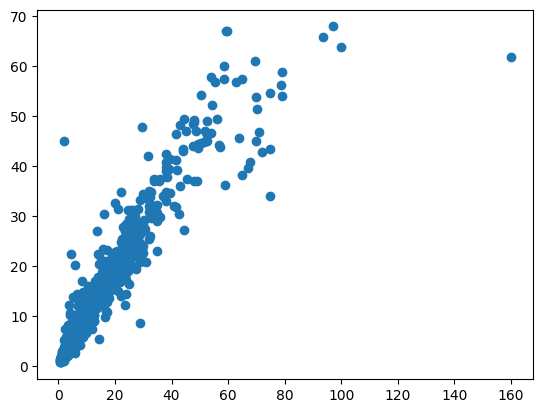

In [ ]:
plt.scatter(y_test,y_predict)

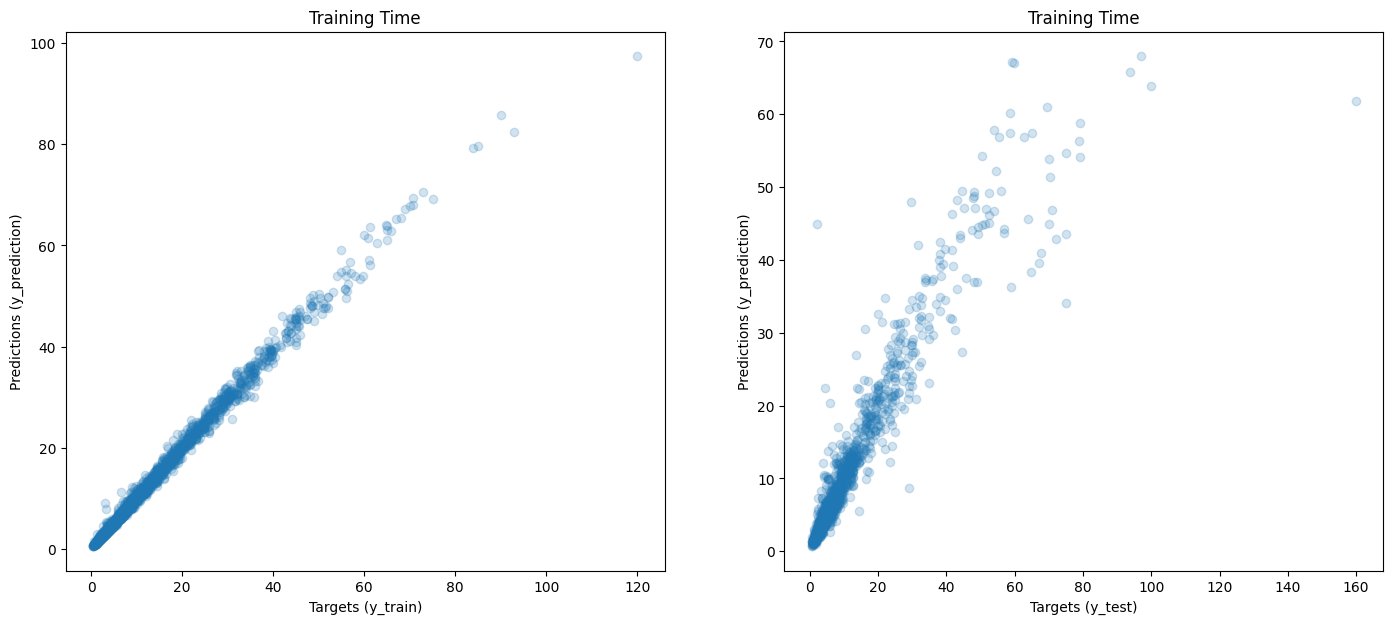

In [ ]:
# Plotting the training set
#Check the prediction with the original values
plt.figure(figsize = (17,7))
y_predict_train = fmodel_random.predict(x_train_scaled)
plt.subplot(1,2,1)
plt.scatter(y_train, y_predict_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_prediction)');
plt.title('Training Time');

#Plotting testing error
y_predict = fmodel_random.predict(x_test_scaled)
plt.subplot(1,2,2)
plt.scatter(y_test, y_predict, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_prediction)');
plt.title('Training Time');

Checking the residual

<ipython-input-62-ff990452bbe2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual_train);
<ipython-input-62-ff990452bbe2>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual_test)


Text(0.5, 1.0, 'Testing Residual')

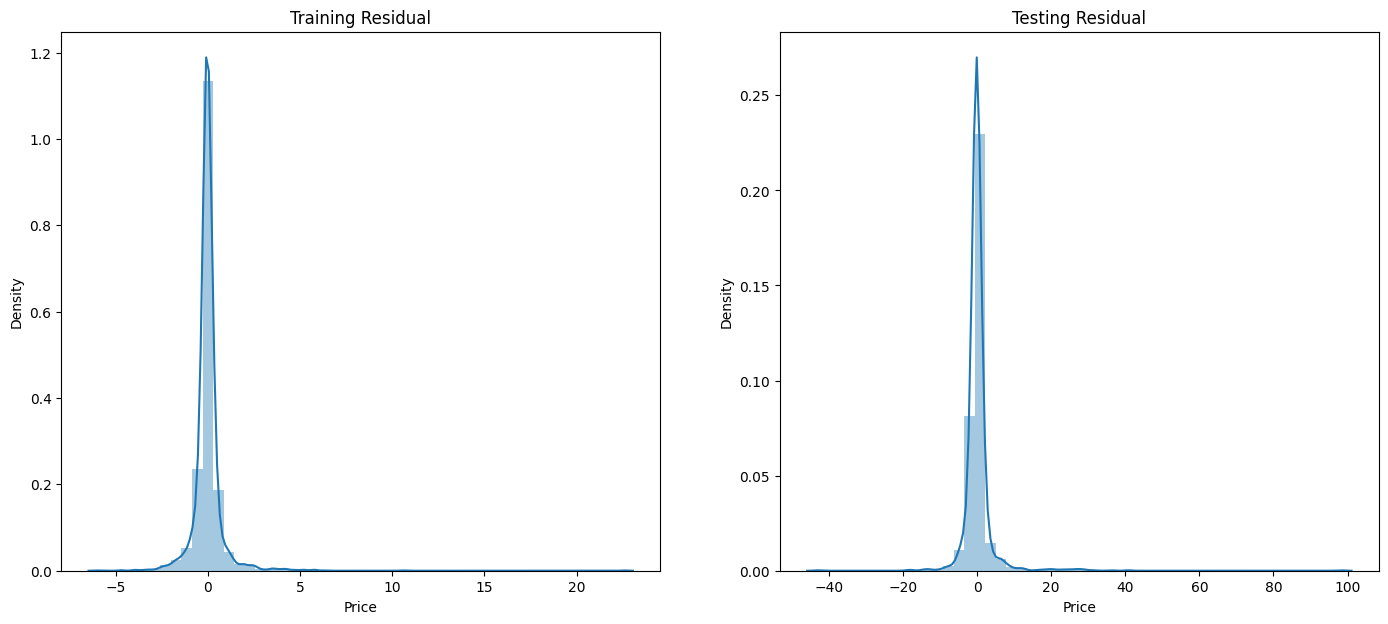

In [ ]:
#Plotting the distribution of the residual
residual_train = (y_train - fmodel_random.predict(x_train_scaled))
residual_test = (y_test - fmodel_random.predict(x_test_scaled))

#plotting the distribution of the residual on the training set
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train);
plt.title('Training Residual')

#plotting the distribution of the residual
plt.subplot(1,2,2)
sns.distplot(residual_test)
plt.title('Testing Residual')

Most of the data lie on 0 which shows that it makes right decisions most of the time

##Support Vector Regressor (SVR)

Mean Squared Error (MSE): 26.664858743126537
Mean Absolute Error (MAE): 2.038223764998632
R-squared (R2): 0.8264444399904441


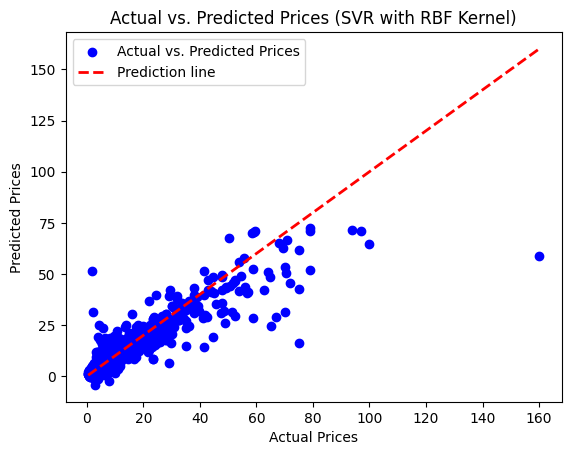

In [ ]:
from sklearn.svm import SVR

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

# Step 4: Train the SVR model on the scaled data
svr = SVR(kernel='rbf',C=1e3, gamma='scale', degree=3)
svr.fit(x_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred = svr.predict(x_test_scaled)

# Step 5: Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted Prices')

# Plot the line representing perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Prediction line')

# Set labels and title
plt.title('Actual vs. Predicted Prices (SVR with RBF Kernel)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Add legend
plt.legend()

# Show the plot
plt.show()

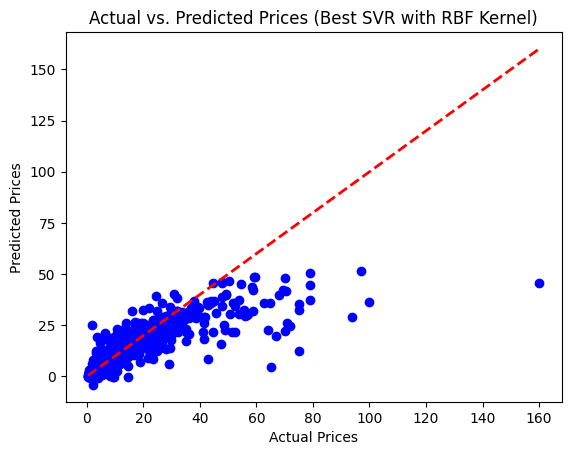

Best Parameters: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

Testing Metrics:
MSE: 46.49019166432424, MAE: 2.614127997750191, R2: 0.6974058131347405


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
          'C': [1, 10, 100, 1000],
          'gamma': [0.1,0.01,0.001, 0.0001],
          'kernel': ['rbf']}

# Create the SVR model with RBF kernel
svr_model = SVR(kernel='rbf')

# Create GridSearchCV
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data and get the best model
best_svr_model = grid_search.fit(x_train_scaled, y_train).best_estimator_

# Make predictions on the test set using the best model
y_test_pred = best_svr_model.predict(x_test_scaled)

# Visualize the predictions with RBF kernel
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Prices (Best SVR with RBF Kernel)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Calculate evaluation metrics on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Print the evaluation metrics
print("\nTesting Metrics:")
print(f"MSE: {mse_test}, MAE: {mae_test}, R2: {r2_test}")



##Ridge Regression

Best Model: Ridge Regression
Best Parameters: {'alpha': 0.1}
Mean Squared Error (MSE): 194.44869432569456
Mean Absolute Error (MAE): 3.3937715342372035
R-squared (R2): -0.3357129559371297
Root Mean Squared Error (RMSE): 13.944486162124962
Training score: 0.7739421909631001


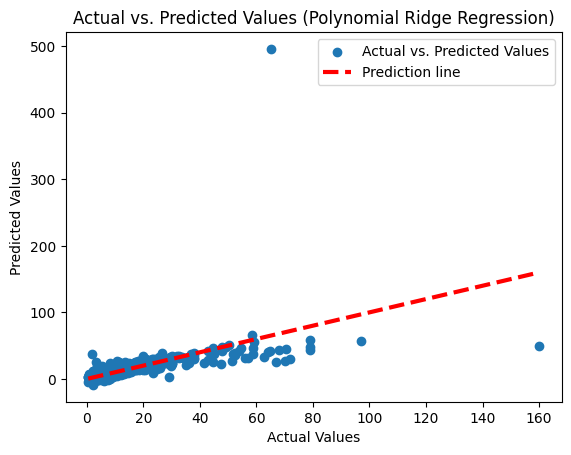

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming x and y are your features and target variable

# Split the data (consider using a fixed test set for hyperparameter tuning)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Fit polynomial features on training data
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(x_train_scaled)
X_poly_test = poly.fit_transform(x_test_scaled)

# Define the parameter grid for the grid search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
}

# Create Ridge Regression model
ridge_model = Ridge()

# Create GridSearchCV object
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Perform grid search on training data
grid_search.fit(X_poly_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Fit the Ridge Regression model with the best parameters
best_ridge_model = Ridge(**best_params)
best_ridge_model.fit(X_poly_train, y_train)

# Make predictions on the test set
y_pred_poly = best_ridge_model.predict(X_poly_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Score on training data (using x_train_scaled, not X_poly)
training_poly = best_ridge_model.score(X_poly_train, y_train)

# Display metrics
print(f"Best Model: Ridge Regression")
print(f'Best Parameters: {best_params}')
print(f'Mean Squared Error (MSE): {mse_poly}')
print(f'Mean Absolute Error (MAE): {mae_poly}')
print(f'R-squared (R2): {r2_poly}')
print(f'Root Mean Squared Error (RMSE): {rmse_poly}')
print(f"Training score: {training_poly}")

# Plotting actual vs. predicted values with the line of best fit
plt.scatter(y_test, y_pred_poly, label='Actual vs. Predicted Values')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Polynomial Ridge Regression)")

# Plot the line of best fit
sort_axis = np.argsort(y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=3,
         label='Prediction line')
# Add legend
plt.legend()

# Show the plot
plt.show()


##Lasso Regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline



test_sizes = [0.1,0.2,0.3]  # Define the test sizes

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Define the Lasso model
    lasso_model = Lasso(max_iter=10000)
    poly_features = PolynomialFeatures()
    pipeline = make_pipeline(poly_features, lasso_model)

    param_grid = {
        'polynomialfeatures__degree': [1, 2, 3],
        'lasso__alpha': [0.01, 0.1, 1, 10]
    }

    # Create a RandomizedSearchCV instance with the pipeline and parameter grid
    random_search = RandomizedSearchCV(pipeline, param_grid, cv=5, n_iter=10, random_state=0)

    # Fit the RandomizedSearchCV instance to your training data
    random_search.fit(x_train_scaled, y_train)

    # Get the best hyperparameters
    best_params = random_search.best_params_

    # Create a final model with the best hyperparameters and fit it to the training data
    final_model = make_pipeline(PolynomialFeatures(degree=best_params['polynomialfeatures__degree']),MinMaxScaler(), Lasso(alpha=best_params['lasso__alpha']))
    final_model.fit(x_train_scaled, y_train)
    # Make predictions on the test set
    y_pred_lasso = final_model.predict(x_test_scaled)

    # Evaluate the final Lasso model
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    rmse_lasso = np.sqrt(mse_lasso)
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)

    # Display metrics
    print(f'\nElastic-Net Regression Model: {test_size}')
    print(f'Mean Squared Error (MSE) - Lasso: {mse_lasso}')
    print(f'Root Mean Squared Error (RMSE) - Lasso: {rmse_lasso}')
    print(f'Mean Absolute Error (MAE) - Lasso: {mae_lasso}')
    print(f'R-squared (R2) - Lasso: {r2_lasso}\n')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e+03, tolerance: 6.524e+01
  model = cd_fast.enet_coordinate_descent(



Elastic-Net Regression Model: 0.1
Mean Squared Error (MSE) - Lasso: 177.86968861767716
Root Mean Squared Error (RMSE) - Lasso: 13.33677954446564
Mean Absolute Error (MAE) - Lasso: 3.4433349593084737
R-squared (R2) - Lasso: -0.08866935201463355



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.707e+02, tolerance: 5.761e+01
  model = cd_fast.enet_coordinate_descent(



Elastic-Net Regression Model: 0.2
Mean Squared Error (MSE) - Lasso: 111.99423841225465
Root Mean Squared Error (RMSE) - Lasso: 10.582733031322988
Mean Absolute Error (MAE) - Lasso: 3.14672549702759
R-squared (R2) - Lasso: 0.23068573046317908


Elastic-Net Regression Model: 0.3
Mean Squared Error (MSE) - Lasso: 69.80913200457012
Root Mean Squared Error (RMSE) - Lasso: 8.355185934769501
Mean Absolute Error (MAE) - Lasso: 3.1837441056312388
R-squared (R2) - Lasso: 0.545628082430503



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.658e+02, tolerance: 4.746e+01
  model = cd_fast.enet_coordinate_descent(


##k-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Create KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Fit the model to the scaled training data
    knn_model.fit(x_train_scaled, y_train)

    # Make predictions on the scaled test set
    y_predict = knn_model.predict(x_test_scaled)

    print(f'\nElastic-Net Regression Model: {test_size}')

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_predict)
    print(f'Mean Squared Error (KNN): {mse}')

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_predict)
    print(f"Mean Absolute Error (MAE): {mae}")

    # R-squared (R²)
    r2 = r2_score(y_test, y_predict)
    print(f"R-squared (R²): {r2}")

    # Training and Testing scores
    print(f"Training score: {knn_model.score(x_train_scaled, y_train)}")
    print(f"Testing score: {knn_model.score(x_test_scaled, y_test)}\n")


Elastic-Net Regression Model: 0.1
Mean Squared Error (KNN): 28.780179123745818
Mean Absolute Error (MAE): 2.3380234113712373
R-squared (R²): 0.8238480136721869
Training score: 0.8607480467798112
Testing score: 0.8238480136721869


Elastic-Net Regression Model: 0.2
Mean Squared Error (KNN): 36.5767420083682
Mean Absolute Error (MAE): 2.3585790794979085
R-squared (R²): 0.7487459180121045
Training score: 0.8642357474568921
Testing score: 0.7487459180121045


Elastic-Net Regression Model: 0.3
Mean Squared Error (KNN): 44.0627265878416
Mean Absolute Error (MAE): 2.6145822643614056
R-squared (R²): 0.7132056365956911
Training score: 0.8598312927268142
Testing score: 0.7132056365956911



In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# The number of folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# KNN with hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
knn_model = KNeighborsRegressor()

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    grid_search = GridSearchCV(knn_model, param_grid, cv=kf, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)

    best_params = grid_search.best_params_
    print(f"Best Hyperparameters: {best_params}")

    best_knn_model = grid_search.best_estimator_

# Evaluate the model using k-fold cross-validation
cv_scores = cross_val_score(best_knn_model, x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
avg_mse_cv = -np.mean(cv_scores)
print(f'Average Cross-Validation MSE (KNN): {avg_mse_cv}')

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5}
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5}
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3}
Average Cross-Validation MSE (KNN): 81.94219263390048


##Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 6: Train the Decision Tree Regressor model on the scaled data
decision_tree_model = DecisionTreeRegressor(random_state=42)
for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    decision_tree_model.fit(x_train_scaled, y_train)

    # Step 7: Make predictions on the test set
    y_pred_tree = decision_tree_model.predict(x_test_scaled)

    # Step 8: Evaluate the performance of the Decision Tree model
    mse_tree = mean_squared_error(y_test, y_pred_tree)
    mae_tree = mean_absolute_error(y_test, y_pred_tree)
    r2_tree = r2_score(y_test, y_pred_tree)

    print(f'\nDecision Tree Model:{test_size}')
    print(f'Mean Squared Error (MSE): {mse_tree}')
    print(f'Mean Absolute Error (MAE): {mae_tree}')
    print(f'R-squared (R2): {r2_tree}')


Decision Tree Model:0.1
Mean Squared Error (MSE): 35.97715016722408
Mean Absolute Error (MAE): 2.1964214046822743
R-squared (R2): 0.7797982272062489

Decision Tree Model:0.2
Mean Squared Error (MSE): 40.06988948628545
Mean Absolute Error (MAE): 2.164444909344491
R-squared (R2): 0.7247506818423104

Decision Tree Model:0.3
Mean Squared Error (MSE): 34.995535164528725
Mean Absolute Error (MAE): 2.301232571109872
R-squared (R2): 0.7722219434265891


##Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

# Step 9: Train the Elastic-Net Regression model on the scaled data
enet_model = ElasticNet(alpha=0.01, l1_ratio=0.1)  # You can adjust alpha and l1_ratio as needed

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    enet_model.fit(x_train_scaled, y_train)

    # Step 10: Make predictions on the test set
    y_pred_enet = enet_model.predict(x_test_scaled)

    # Step 11: Evaluate the performance of the Elastic-Net model
    mse_enet = mean_squared_error(y_test, y_pred_enet)
    mae_enet = mean_absolute_error(y_test, y_pred_enet)
    r2_enet = r2_score(y_test, y_pred_enet)

    print(f'\nElastic-Net Regression Model: {test_size}')
    print(f'Mean Squared Error (MSE): {mse_enet}')
    print(f'Mean Absolute Error (MAE): {mae_enet}')
    print(f'R-squared (R2): {r2_enet}')



Elastic-Net Regression Model: 0.1
Mean Squared Error (MSE): 84.8677620977766
Mean Absolute Error (MAE): 4.791175654653914
R-squared (R2): 0.48055831048024744

Elastic-Net Regression Model: 0.2
Mean Squared Error (MSE): 79.4980536761176
Mean Absolute Error (MAE): 4.456453082244802
R-squared (R2): 0.4539095228424781

Elastic-Net Regression Model: 0.3
Mean Squared Error (MSE): 81.87304602177286
Mean Absolute Error (MAE): 4.535174407455424
R-squared (R2): 0.4671067831679495
